# Lista 7 de Análise de Dados em Astronomia

Danilo Lessa Bernardineli (8944411)

## Dependências e definições

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy as sp

## Exercício 1

Neste exercício, será analisado o teste T em dois conjuntos de dados: $X \sim \mathcal{N}(0, 1)$ e $Y ~ \sim \mathcal{N}(0, 1) \cup \mathcal{N}(0, 3)$ de modo que a distribuição dominante em $Y$ seja $\mathcal{N}(0, 1)$.

In [2]:
def gerar_dados(N=int(1e3), media_X=0, sigma_X=1, media_Y1=0, media_Y2=0, sigma_Y1=1, sigma_Y2=3, factor=0.1):        
    m = int(N * factor)
    n = N - m
    Y1 = np.random.randn(n) * sigma_Y1 + media_Y1
    Y2 = np.random.randn(m) * sigma_Y2 + media_Y2      
    Y = np.concatenate((Y1, Y2))
    np.random.shuffle(Y)
    X = np.random.randn(N) * sigma_X + media_X    
    return (X, Y)    

In [3]:
def teste_t(X, Y, qtd=10):
    """Fazer o teste t em uma quantidade sorteada de amostras retiradas de X e Y."""
    x = np.random.choice(X, qtd)
    y = np.random.choice(Y, qtd)        
    t = np.mean(X) + np.mean(Y)
    n = len(X)
    m = len(Y)
    v = n + m - 2    
    sx = np.std(X)
    sy = np.std(Y)    
    s = np.sqrt((n * sx ** 2 + m * sy ** 2) / v)    
    t = np.mean(X) - np.mean(Y)
    t /= s * np.sqrt(1 / m + 1 / n)    
    return t

### Teste t conforme contaminação da gaussiana de $\sigma=3$

No bloco seguinte, faço um gráfico do teste t para várias gerações distintas de X e Y em função da porcentagem de contaminação. Não consegui reparar nenhum efeito visualmente no gráfico de dispersão devido a contaminação, o que parece indicar que os outliers devido a variância maior não afetam na refutação da hípotese nula da estatística t

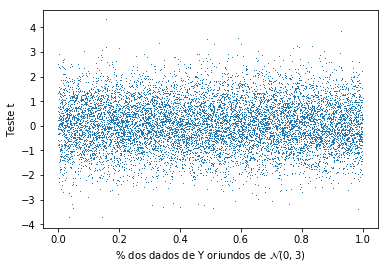

In [4]:
t = []
fac = []
n = 10000
for f in np.arange(n) / n:
    (X, Y) = gerar_dados(factor=f)
    t.append(teste_t(X, Y))
    fac.append(f)    
plt.plot(fac, t, ',')
plt.ylabel("Teste t")
plt.xlabel("% dos dados de Y oriundos de $\mathcal{N}(0, 3)$")
plt.show()

### Teste t conforme contaminação da gaussiana de $\sigma=3$ com média deslocada em 0.5

Nesse bloco é feito a mesma coisa do anterior. Nota-se que o teste t é deslocado aproximadamente linearmente conforme a fração de dados contaminados aumentado. A média e a quantidade dos outliers portanto interferem na refutação da hípotese nula pela estatística t

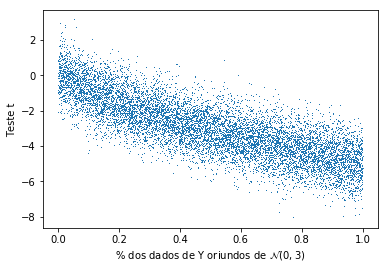

In [5]:
t = []
fac = []
n = 10000
for f in np.arange(n) / n:
    (X, Y) = gerar_dados(factor=f, media_Y2=0.5)
    t.append(teste_t(X, Y))
    fac.append(f)    
plt.plot(fac, t, ',')
plt.ylabel("Teste t")
plt.xlabel("% dos dados de Y oriundos de $\mathcal{N}(0, 3)$")
plt.show()

### Conclusões acerca do teste t

O teste t não parece ser muito afetado pela presença de outliers quando a média desta é idêntica com a da outra distribuição sendo comparada. Em outras palavras, o teste t parece ser robusto quanto a variância dos dados.

## Exercício 2

Neste exercício, será analisado o teste F no conjunto de dados anteriores

In [6]:
def teste_F(X, Y):
    x = np.sum(np.square(X - np.mean(X))) / (len(X) - 1)
    y = np.sum(np.square(Y - np.mean(Y))) / (len(Y) - 1)
    return x / y

### Teste F conforme contaminação da gaussiana de $\sigma=3$

É feito o análogo com o anterior, porém repara-se que rapidamente o teste F se desvia de 1 conforme aumenta a contaminação

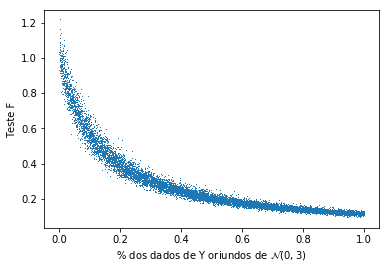

In [7]:
t = []
fac = []
n = 10000
for f in np.arange(n) / n:
    (X, Y) = gerar_dados(factor=f)
    t.append(teste_F(X, Y))
    fac.append(f)    
plt.plot(fac, t, ',')
plt.ylabel("Teste F")
plt.xlabel("% dos dados de Y oriundos de $\mathcal{N}(0, 3)$")
plt.show()

### Teste F conforme contaminação da gaussiana de $\sigma=3$ com média deslocada em 0.5

Nota-se que o resultado é idêntico com o do bloco anterior, o que indica que o teste F é sensível a outliers com média diferente

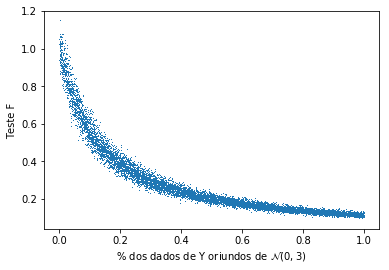

In [8]:
t = []
fac = []
n = 10000
for f in np.arange(n) / n:
    (X, Y) = gerar_dados(factor=f, media_Y2=0.5)
    t.append(teste_F(X, Y))
    fac.append(f)    
plt.plot(fac, t, ',')
plt.ylabel("Teste F")
plt.xlabel("% dos dados de Y oriundos de $\mathcal{N}(0, 3)$")
plt.show()

### Comentários acerca do teste F

Se o teste t é robusto com a variância mas sensível a média das distribuições, o teste F faz um papel inverso sendo sensível a variância dos outliers mas robusta com a média